In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 7
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.9
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[7_10_51_300_0.9_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[7_10_51_300_0.9_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9862

Best Fitness:	700.6043
Solution:	700.0000
Diff:		0.6043

[0:11:38][----------] 1.96% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.8810

Best Fitness:	700.4116
Solution:	700.0000
Diff:		0.4116

[0:22:39][----------] 3.92% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	701.0145

Best Fitness:	700.5279
Solution:	700.0000
Diff:		0.5279

[0:34:04][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	701.0506

Best Fitness:	700.7031
Solution:	700.0000
Diff:		0.7031

[0:43:51][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9858

Best Fitness:	700.5481
Solution:	700.0000
Diff:		0.5481

[0:53:11][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	701.0719

Best Fitness:	700.6196
Solution:	700.0000
Diff:		0.6196

[1:02:37][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9751

Best Fitness:	700.6159
Solution:	700.0000
Diff:		0.6159

[1:11:51][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	701.0367

Best Fitness:	700.7073
Solution:	700.0000
Diff:		0.7073

[1:20:48][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9596

Best Fitness:	700.6137
Solution:	700.0000
Diff:		0.6137

[1:30:08][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	701.0294

Best Fitness:	700.6904
Solution:	700.0000
Diff:		0.6904

[1:38:40][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.8789

Best Fitness:	700.4589
Solution:	700.0000
Diff:		0.4589

[1:46:48][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	701.0168

Best Fitness:	700.7083
Solution:	700.0000
Diff:		0.7083

[1:54:44][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9648

Best Fitness:	700.4577
Solution:	700.0000
Diff:		0.4577

[2:02:28][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9903

Best Fitness:	700.6786
Solution:	700.0000
Diff:		0.6786

[2:10:37][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9866

Best Fitness:	700.6389
Solution:	700.0000
Diff:		0.6389

[2:19:02][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9143

Best Fitness:	700.4549
Solution:	700.0000
Diff:		0.4549

[2:26:20][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	701.0778

Best Fitness:	700.8321
Solution:	700.0000
Diff:		0.8321

[2:33:20][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9955

Best Fitness:	700.6957
Solution:	700.0000
Diff:		0.6957

[2:40:06][####------] 35.29% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9305

Best Fitness:	700.5708
Solution:	700.0000
Diff:		0.5708

[2:47:06][####------] 37.25% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9982

Best Fitness:	700.5823
Solution:	700.0000
Diff:		0.5823

[2:54:03][####------] 39.22% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9206

Best Fitness:	700.5674
Solution:	700.0000
Diff:		0.5674

[3:01:06][####------] 41.18% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.8424

Best Fitness:	700.2626
Solution:	700.0000
Diff:		0.2626

[3:07:51][####------] 43.14% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.8492

Best Fitness:	700.4482
Solution:	700.0000
Diff:		0.4482

[3:13:48][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9147

Best Fitness:	700.3692
Solution:	700.0000
Diff:		0.3692

[3:19:49][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9475

Best Fitness:	700.5499
Solution:	700.0000
Diff:		0.5499

[3:25:45][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9462

Best Fitness:	700.6434
Solution:	700.0000
Diff:		0.6434

[3:31:45][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9484

Best Fitness:	700.5301
Solution:	700.0000
Diff:		0.5301

[3:37:39][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	701.0092

Best Fitness:	700.6910
Solution:	700.0000
Diff:		0.6910

[3:43:22][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.8738

Best Fitness:	700.4857
Solution:	700.0000
Diff:		0.4857

[3:48:24][######----] 56.86% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9740

Best Fitness:	700.6252
Solution:	700.0000
Diff:		0.6252

[3:53:19][######----] 58.82% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9014

Best Fitness:	700.4480
Solution:	700.0000
Diff:		0.4480

[3:58:11][######----] 60.78% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9556

Best Fitness:	700.6785
Solution:	700.0000
Diff:		0.6785

[4:03:04][######----] 62.75% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.8630

Best Fitness:	700.4551
Solution:	700.0000
Diff:		0.4551

[4:07:58][######----] 64.71% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9586

Best Fitness:	700.4554
Solution:	700.0000
Diff:		0.4554

[4:12:34][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9481

Best Fitness:	700.4887
Solution:	700.0000
Diff:		0.4887

[4:16:29][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9173

Best Fitness:	700.4246
Solution:	700.0000
Diff:		0.4246

[4:20:25][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9120

Best Fitness:	700.4183
Solution:	700.0000
Diff:		0.4183

[4:24:19][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9594

Best Fitness:	700.3814
Solution:	700.0000
Diff:		0.3814

[4:28:13][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	701.0044

Best Fitness:	700.5618
Solution:	700.0000
Diff:		0.5618

[4:32:20][########--] 76.47% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9780

Best Fitness:	700.5396
Solution:	700.0000
Diff:		0.5396

[4:36:06][########--] 78.43% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9566

Best Fitness:	700.3984
Solution:	700.0000
Diff:		0.3984

[4:39:17][########--] 80.39% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	701.1161

Best Fitness:	700.8575
Solution:	700.0000
Diff:		0.8575

[4:42:18][########--] 82.35% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9860

Best Fitness:	700.6290
Solution:	700.0000
Diff:		0.6290

[4:45:19][########--] 84.31% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9518

Best Fitness:	700.5939
Solution:	700.0000
Diff:		0.5939

[4:48:18][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9740

Best Fitness:	700.6308
Solution:	700.0000
Diff:		0.6308

[4:51:18][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9690

Best Fitness:	700.5422
Solution:	700.0000
Diff:		0.5422

[4:54:03][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9100

Best Fitness:	700.3941
Solution:	700.0000
Diff:		0.3941

[4:56:34][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9230

Best Fitness:	700.5203
Solution:	700.0000
Diff:		0.5203

[4:58:57][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.7722

Best Fitness:	700.3234
Solution:	700.0000
Diff:		0.3234

[5:01:20][##########] 96.08% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	701.0086

Best Fitness:	700.6163
Solution:	700.0000
Diff:		0.6163

[5:03:44][##########] 98.04% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	700.9545

Best Fitness:	700.6386
Solution:	700.0000
Diff:		0.6386

[5:06:15][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

5:06:15

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
293,1.030683,0.961976,0.68856,1.015646,1.037901,0.960849,0.983378,0.948763,0.961876,1.016349,...,0.912661,1.013274,1.034808,0.952363,1.018207,0.979719,0.978654,1.008269,0.924951,50
294,1.030683,0.961976,0.68856,1.015646,1.037901,0.960849,0.983378,0.948763,0.961876,1.016349,...,0.912661,1.013274,1.034808,0.952363,1.018207,0.979719,0.978654,1.008269,0.924951,50
295,1.030683,0.961976,0.68856,1.015646,1.037901,0.960849,0.983378,0.948763,0.961876,1.016349,...,0.912661,1.013274,1.034808,0.952363,1.018207,0.979719,0.978654,1.008269,0.924951,50
296,1.030683,0.961976,0.68856,1.015646,1.037901,0.960849,0.983378,0.948763,0.961876,1.016349,...,0.912661,1.013274,1.034808,0.952363,1.018207,0.979719,0.978654,1.008269,0.924951,50
297,1.030683,0.961976,0.68856,1.015646,1.037901,0.960849,0.983378,0.948763,0.961876,1.016349,...,0.912661,1.013274,1.034808,0.952363,1.018207,0.979719,0.978654,1.008269,0.924951,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.6042687529704835

Best error for run 1: 0.411569232354168

Best error for run 2: 0.5279462110366921

Best error for run 3: 0.7031143915622806

Best error for run 4: 0.5480646948561798

Best error for run 5: 0.6196029721655805

Best error for run 6: 0.6159135495375949

Best error for run 7: 0.7073089067904448

Best error for run 8: 0.6136766083830025

Best error for run 9: 0.6904465235883208

Best error for run 10: 0.45886964071110015

Best error for run 11: 0.7082970877786465

Best error for run 12: 0.45772448844775226

Best error for run 13: 0.6786208940576444

Best error for run 14: 0.6388675607465757

Best error for run 15: 0.4549247649385961

Best error for run 16: 0.8321119680575748

Best error for run 17: 0.6957039774797522

Best error for run 18: 0.5707539364227614

Best error for run 19: 0.582257113564765

Best error for run 20: 0.5673943182702033

Best error for run 21: 0.2626398533413976

Best error for run 22: 0.44824437583326926

Best error for run 23: 0.3691772858563809

Best error for run 24: 0.5499436049984752

Best error for run 25: 0.6433713247646438

Best error for run 26: 0.5301226854805918

Best error for run 27: 0.6910119131872534

Best error for run 28: 0.48574832809958934

Best error for run 29: 0.6252041351409616

Best error for run 30: 0.44799393533924103

Best error for run 31: 0.678524136804981

Best error for run 32: 0.4551029344580684

Best error for run 33: 0.4554219037582925

Best error for run 34: 0.48870893125206294

Best error for run 35: 0.4246081080964359

Best error for run 36: 0.4183039631975589

Best error for run 37: 0.3813800598823036

Best error for run 38: 0.561770184207262

Best error for run 39: 0.5396089970724915

Best error for run 40: 0.3983985478193972

Best error for run 41: 0.8575235459959458

Best error for run 42: 0.6290389027444689

Best error for run 43: 0.5938849718253323

Best error for run 44: 0.6308470044327805

Best error for run 45: 0.5422136814285068

Best error for run 46: 0.3941008180818244

Best error for run 47: 0.5203397881455203

Best error for run 48: 0.323387083780176

Best error for run 49: 0.6162922075787947

Best error for run 50: 0.6385772924818411

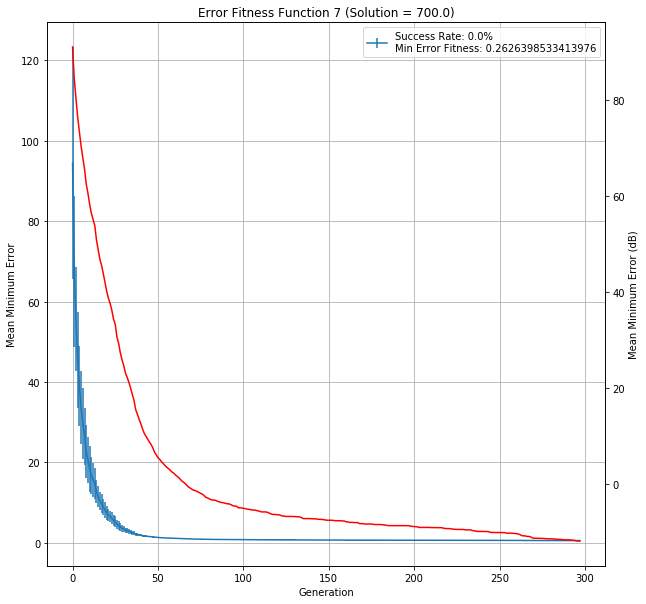

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[7_10_51_300_0.9_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,7,10,0.9,0.604269,0.411569,0.527946,0.703114,0.548065,0.619603,...,0.630847,0.542214,0.394101,0.52034,0.323387,0.616292,0.638577,0.554685,5:06:15,90000
